In [3]:
import matplotlib.pyplot as plt
import cv2
import glob
import json
import numpy as np


def json_visualize(language, id, type = 'train'):
    data_path = '/data/ephemeral/home/code/data/'
    image_files = glob.glob(data_path + language +'_receipt/img/' + type + '/*.jpg')
    img = cv2.imread(image_files[id])

    json_path = data_path + language +'_receipt/ufo/' + type + '.json'
    with open(json_path, 'r') as json_file:
        jf = json.load(json_file)
    image_name = image_files[id].split('/')[-1]
    
    for word in jf['images'][image_name]['words'].keys():
        points_list = []
        points = jf['images'][image_name]['words'][word]['points']
        points_list.append(points)
        cv2.polylines(img, np.int32(points_list), True, (0,0,255), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


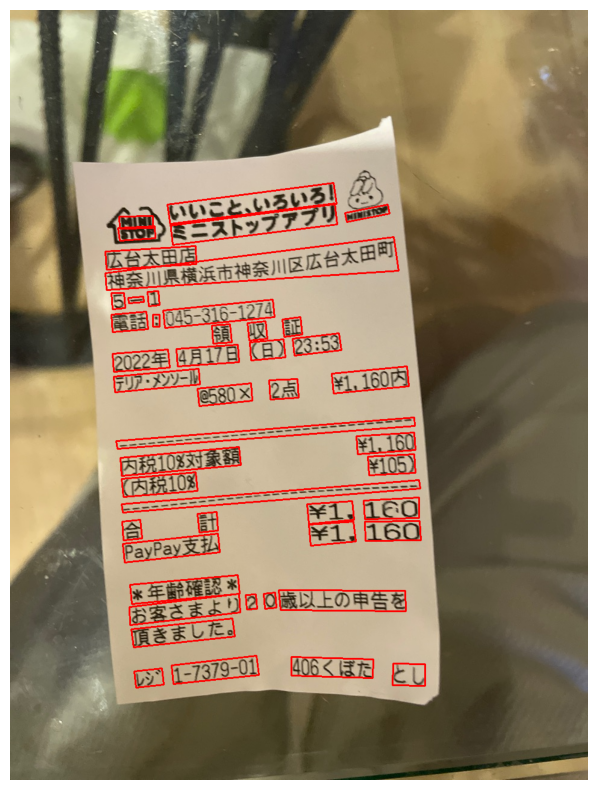

In [2]:
json_visualize(language='japanese', id=0)

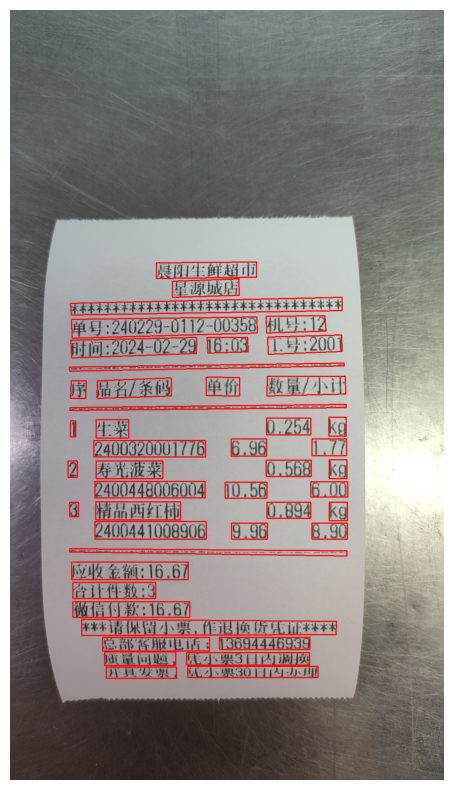

In [3]:
json_visualize(language='chinese', id=0)

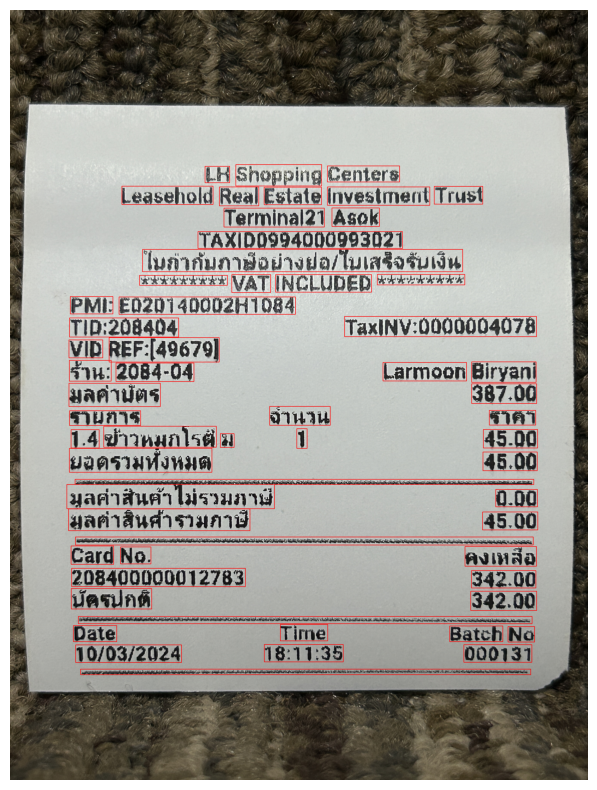

In [5]:
json_visualize(language='thai', id=0)

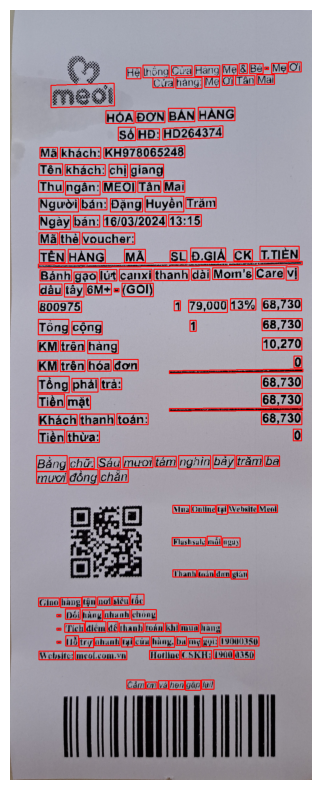

In [7]:
json_visualize(language='vietnamese', id=0)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_img(img):
    img = img.astype('uint8')
    plt.figure(figsize=(10, 10))
    plt.imshow(img,cmap='gray')
    plt.show()

def sharpening(image, strength):
    image = image.astype('uint8')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    b = (1 - strength) / 8
    sharpening_kernel = np.array([[b, b, b],
                                  [b, strength, b],
                                  [b, b, b]])
    kernel = np.ones((3, 3), np.uint8)
    gray_image = cv2.erode(gray_image, kernel, iterations=1)
    gray_image = cv2.filter2D(gray_image, -1, sharpening_kernel)
    gray_image = cv2.inRange(gray_image, (120), (255))
    return gray_image

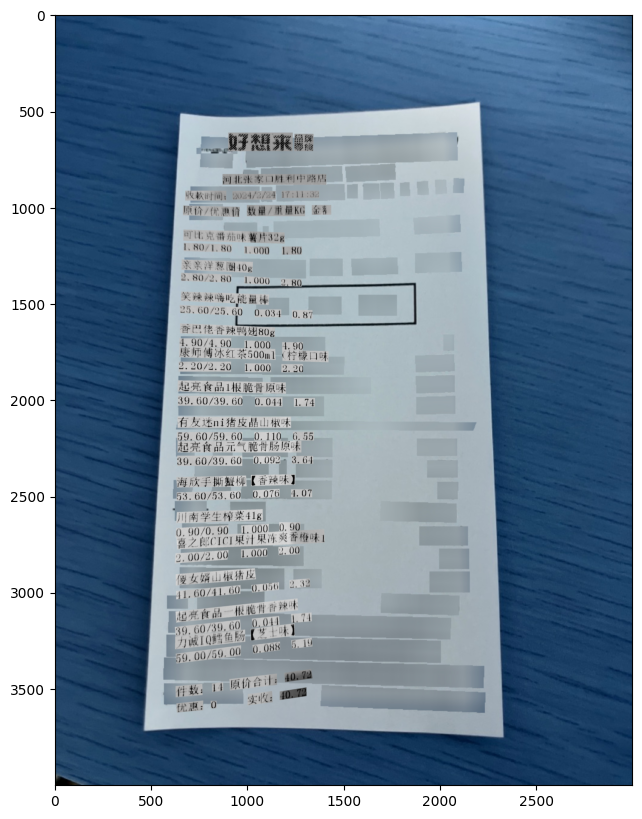

In [11]:
image = cv2.imread('/data/ephemeral/home/code/data/chinese_receipt/img/synthetic/extractor.zh.in_house.appen_000016_page0001.jpg')

visualize_img(image)

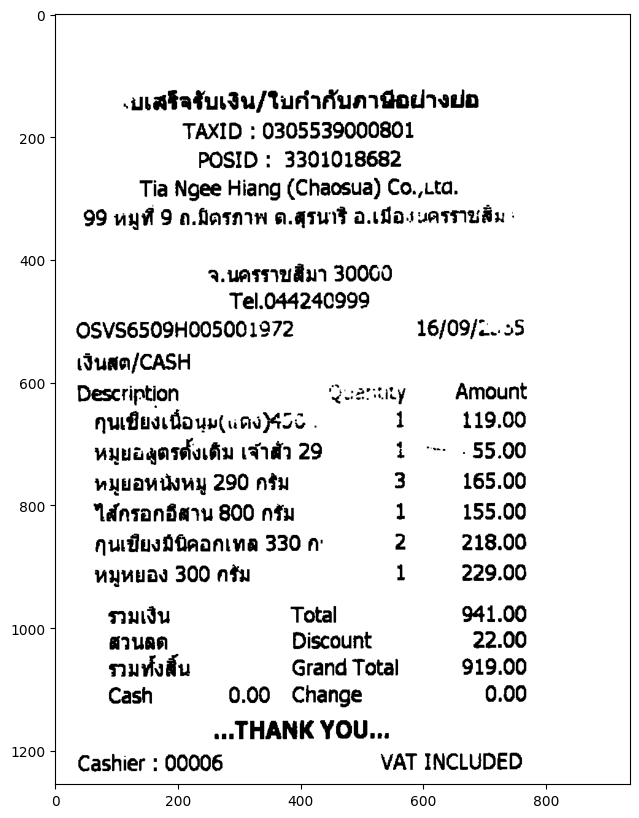

In [9]:
sharpening_image = sharpening(image,0.7)
visualize_img(sharpening_image)

In [1]:
def csv_visualize(language, id, type = 'test'):
    data_path = '/data/ephemeral/home/code/data/'
    image_files = glob.glob(data_path + language +'_receipt/img/' + type + '/*.jpg')
    img = cv2.imread(image_files[id])

    json_path = 'predictions/output_1106_with_randaug_sharpening_relabel_synthetic.csv'
    with open(json_path, 'r') as json_file:
        jf = json.load(json_file)
    image_name = image_files[id].split('/')[-1]
    
    for word in jf['images'][image_name]['words'].keys():
        points_list = []
        points = jf['images'][image_name]['words'][word]['points']
        points_list.append(points)
        cv2.polylines(img, np.int32(points_list), True, (0,0,255), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

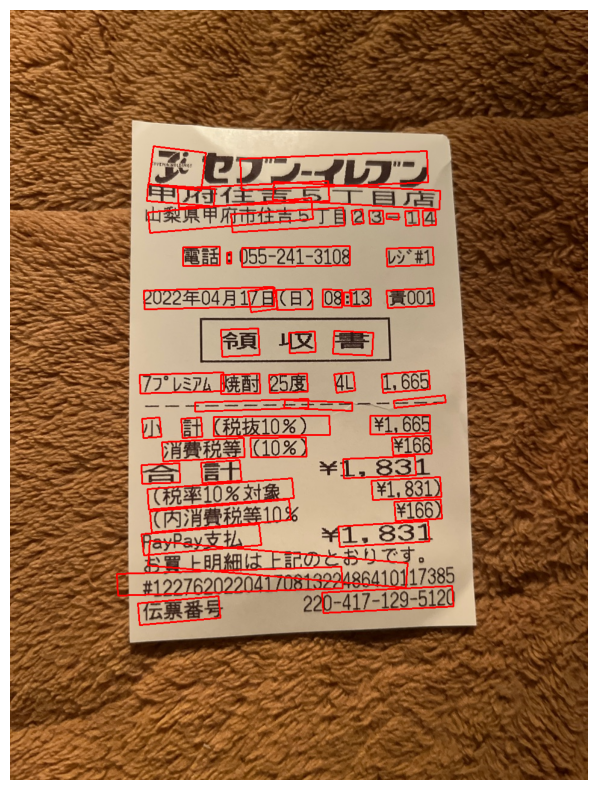

In [4]:
csv_visualize(language='japanese', id =0)

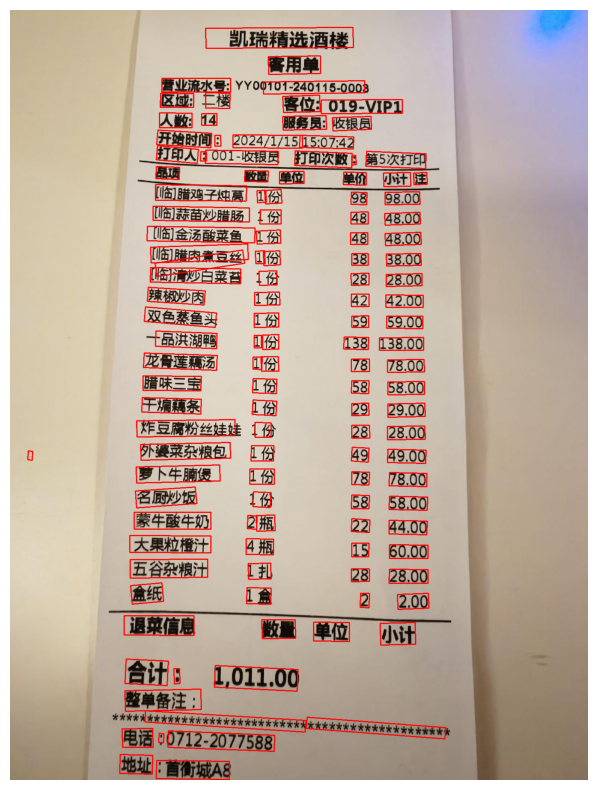

In [5]:
csv_visualize(language='chinese', id =0)

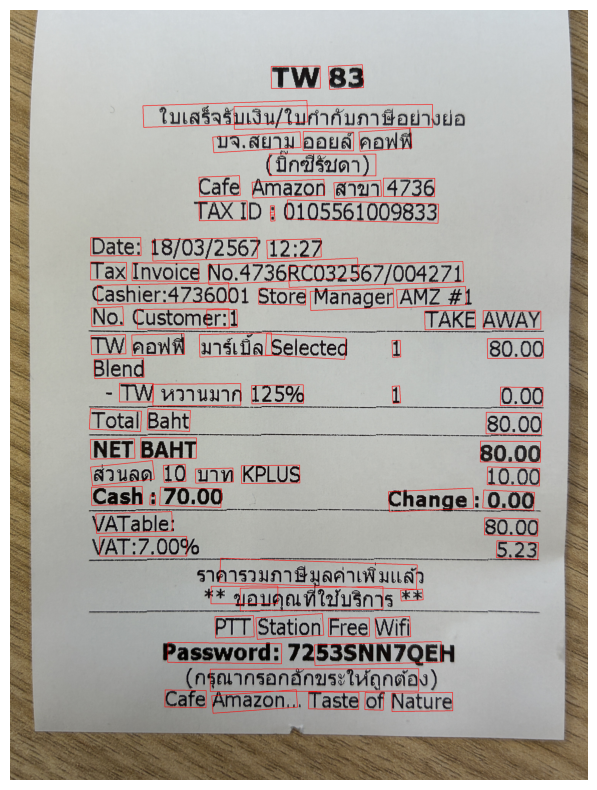

In [6]:
csv_visualize(language='thai', id =0)

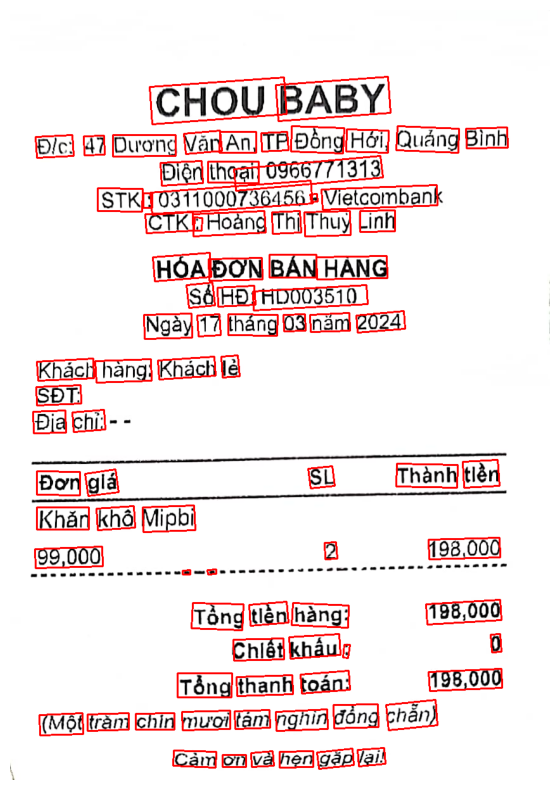

In [7]:
csv_visualize(language='vietnamese', id =0)

In [17]:
language = 'japanese'
type = 'train'

data_path = '/data/ephemeral/home/code/data/'
image_files = glob.glob(data_path + language +'_receipt/img/' + 'train' + '/*.jpg')
json_path = data_path + language +'_receipt/ufo/' + type + '.json'
with open(json_path, 'r') as json_file:
    jf = json.load(json_file)

points_list = []
for i in range(len(image_files)):
    image_name = image_files[i].split('/')[-1]
    for word in jf['images'][image_name]['words'].keys():
        points = jf['images'][image_name]['words'][word]['points']
        points_list.append(points)

<Axes: ylabel='Count'>

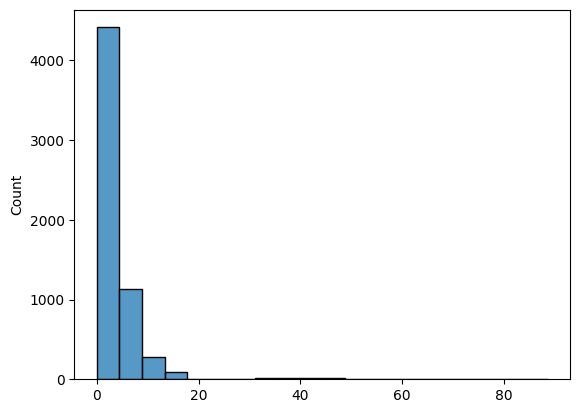

In [18]:
from scipy.spatial import distance
import seaborn as sns

w_h_ratio = []

for i in range(len(points_list)):
    width = distance.pdist(np.array(points_list[i][:2]),metric='euclidean').item()
    height = distance.pdist(np.array(points_list[i][1:3]),metric='euclidean').item()

    w_h_ratio.append(width/height)

sns.histplot(w_h_ratio,bins=20)

In [10]:
language = 'japanese'
type = 'train'

data_path = '/data/ephemeral/home/code/data/'
image_files = glob.glob(data_path + language +'_receipt/img/' + 'test' + '/*.jpg')
json_path = 'predictions/output_1106_with_randaug_sharpening.csv'
with open(json_path, 'r') as json_file:
    cf = json.load(json_file)

points_list = []
for i in range(len(image_files)):
    image_name = image_files[i].split('/')[-1]
    for word in cf['images'][image_name]['words'].keys():
        points = cf['images'][image_name]['words'][word]['points']
        points_list.append(points)

<Axes: ylabel='Count'>

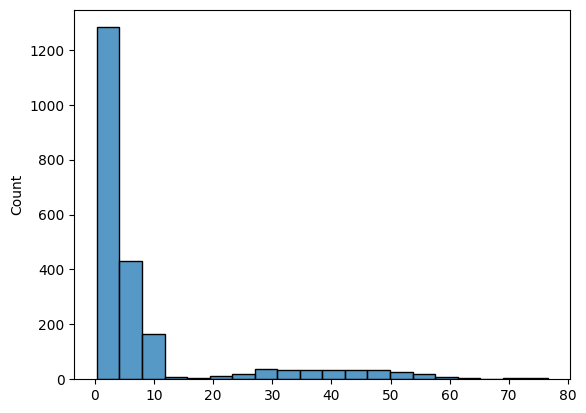

In [9]:
from scipy.spatial import distance
import seaborn as sns

pred_w_h_ratio = []

for i in range(len(points_list)):
    width = distance.pdist(np.array(points_list[i][:2]),metric='euclidean').item()
    height = distance.pdist(np.array(points_list[i][1:3]),metric='euclidean').item()

    pred_w_h_ratio.append(width/height)

sns.histplot(pred_w_h_ratio,bins=20)

<Axes: ylabel='Count'>

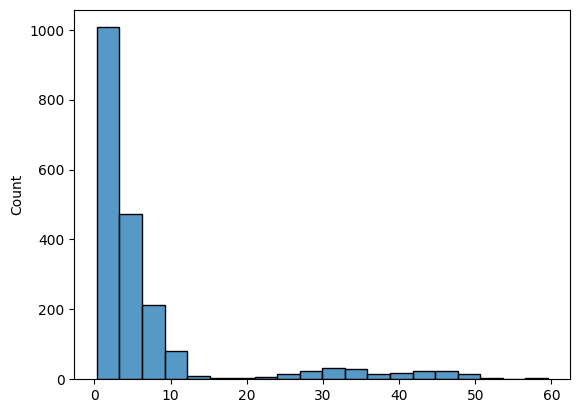

In [11]:
from scipy.spatial import distance
import seaborn as sns

pred_w_h_ratio = []

for i in range(len(points_list)):
    width = distance.pdist(np.array(points_list[i][:2]),metric='euclidean').item()
    height = distance.pdist(np.array(points_list[i][1:3]),metric='euclidean').item()

    pred_w_h_ratio.append(width/height)

sns.histplot(pred_w_h_ratio,bins=20)

In [4]:
from torchvision.transforms import v2 as torchvision_